best: 65.0
avg: 44.390625
-----------------------
best: 61.0
avg: 44.375
-----------------------
best: 57.5
avg: 42.28125
-----------------------
best: 57.5
avg: 44.4375
-----------------------
best: 61.5
avg: 47.203125
-----------------------
best: 60.5
avg: 44.203125
-----------------------
best: 59.0
avg: 46.359375
-----------------------
best: 58.0
avg: 45.984375
-----------------------
best: 64.5
avg: 44.9375
-----------------------
best: 62.5
avg: 45.84375
-----------------------
[64.5, 65.0, 61.0, 57.5, 57.5, 61.5, 60.5, 59.0, 58.0, 64.5, 62.5]
[46.0, 44.390625, 44.375, 42.28125, 44.4375, 47.203125, 44.203125, 46.359375, 45.984375, 44.9375, 45.84375]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


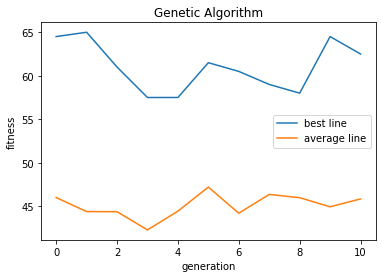

In [4]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(0,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
#     totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
#     return 0.5*totalProtein + 0.5*totalCalories
    return 0.5*totalProtein 
    
def breeding(data, chromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
#         if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
#             if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False
    
    
# def findBestAndAve(chromosome):
#     for i in chromosome:
#         chromosome[i] = fitnessFn(chromosome[i])
#     chromosome.sort(reverse = True)
#     for j in chromosome:
#         crossover(chromosome[j],chromosome[j+1])

# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = 0
    for i in range(0, len(chromosome)):
        temp = int(chromosome[i])*(2**(len(chromosome)-i-1))
        menuNumber += temp
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    return {"sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}

chromosome = []
bestLn = []
avgLn = []
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in range(10):
    breeding(article_read, chromosome, bestLn, avgLn)
    gen = gen + 1
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
print(bestLn)
print(avgLn)
print(genLn)
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 








best: 1050.5
avg: 861.6875
bad chromosome: 32
-----------------------
1
best: 1050.5
avg: 864.765625
bad chromosome: 51
-----------------------
2
best: 1050.5
avg: 866.796875
bad chromosome: 137
-----------------------
3
best: 1050.5
avg: 866.796875
bad chromosome: 404
-----------------------
4
best: 1050.5
avg: 872.6875
bad chromosome: 762
-----------------------
5
best: 1050.5
avg: 875.078125
bad chromosome: 808
-----------------------
6
best: 1050.5
avg: 876.5
bad chromosome: 899
-----------------------
7
best: 1050.5
avg: 875.96875
bad chromosome: 1047
-----------------------
8
best: 1050.5
avg: 878.046875
bad chromosome: 1068
-----------------------
9
best: 1050.5
avg: 880.09375
bad chromosome: 1068
-----------------------
10
best: 1050.5
avg: 883.296875
bad chromosome: 1143
-----------------------
11
best: 1050.5
avg: 882.6875
bad chromosome: 1177
-----------------------
12
best: 1050.5
avg: 884.5
bad chromosome: 1237
-----------------------
13
best: 1050.5
avg: 884.46875
bad chr

best: 1091.0
avg: 941.75
bad chromosome: 10168
-----------------------
110
best: 1091.0
avg: 941.109375
bad chromosome: 10210
-----------------------
111
best: 1091.0
avg: 942.515625
bad chromosome: 10252
-----------------------
112
best: 1091.0
avg: 943.53125
bad chromosome: 10331
-----------------------
113
best: 1091.0
avg: 941.765625
bad chromosome: 10502
-----------------------
114
best: 1091.0
avg: 941.203125
bad chromosome: 10546
-----------------------
115
best: 1091.0
avg: 944.46875
bad chromosome: 10562
-----------------------
116
best: 1091.0
avg: 946.25
bad chromosome: 10579
-----------------------
117
best: 1091.0
avg: 944.953125
bad chromosome: 10628
-----------------------
118
best: 1091.0
avg: 943.375
bad chromosome: 10706
-----------------------
119
best: 1091.0
avg: 944.875
bad chromosome: 10726
-----------------------
120
best: 1091.0
avg: 951.171875
bad chromosome: 10826
-----------------------
121
best: 1091.0
avg: 948.9375
bad chromosome: 10866
-------------------

best: 1091.0
avg: 971.140625
bad chromosome: 18312
-----------------------
217
best: 1091.0
avg: 972.125
bad chromosome: 18315
-----------------------
218
best: 1091.0
avg: 972.6875
bad chromosome: 18439
-----------------------
219
best: 1091.0
avg: 970.90625
bad chromosome: 18491
-----------------------
220
best: 1091.0
avg: 972.25
bad chromosome: 18662
-----------------------
221
best: 1091.0
avg: 969.96875
bad chromosome: 18668
-----------------------
222
best: 1091.0
avg: 972.828125
bad chromosome: 18771
-----------------------
223
best: 1091.0
avg: 972.875
bad chromosome: 18882
-----------------------
224
best: 1091.0
avg: 970.578125
bad chromosome: 18909
-----------------------
225
best: 1091.0
avg: 973.28125
bad chromosome: 18986
-----------------------
226
best: 1091.0
avg: 970.96875
bad chromosome: 19128
-----------------------
227
best: 1091.0
avg: 969.90625
bad chromosome: 19444
-----------------------
228
best: 1091.0
avg: 971.84375
bad chromosome: 19685
-------------------

best: 1091.0
avg: 974.515625
bad chromosome: 29378
-----------------------
322
best: 1091.0
avg: 977.453125
bad chromosome: 29427
-----------------------
323
best: 1091.0
avg: 977.296875
bad chromosome: 29528
-----------------------
324
best: 1091.0
avg: 979.078125
bad chromosome: 29569
-----------------------
325
best: 1091.0
avg: 977.09375
bad chromosome: 29606
-----------------------
326
best: 1091.0
avg: 975.125
bad chromosome: 29657
-----------------------
327
best: 1091.0
avg: 976.015625
bad chromosome: 29823
-----------------------
328
best: 1091.0
avg: 977.1875
bad chromosome: 29827
-----------------------
329
best: 1091.0
avg: 977.4375
bad chromosome: 29912
-----------------------
330
best: 1091.0
avg: 979.59375
bad chromosome: 29960
-----------------------
331
best: 1091.0
avg: 976.375
bad chromosome: 30044
-----------------------
332
best: 1091.0
avg: 976.484375
bad chromosome: 30128
-----------------------
333
best: 1091.0
avg: 976.796875
bad chromosome: 30229
-------------

best: 1091.0
avg: 991.421875
bad chromosome: 39136
-----------------------
429
best: 1091.0
avg: 989.125
bad chromosome: 39473
-----------------------
430
best: 1091.0
avg: 991.265625
bad chromosome: 39507
-----------------------
431
best: 1091.0
avg: 990.046875
bad chromosome: 39944
-----------------------
432
best: 1091.0
avg: 988.3125
bad chromosome: 39964
-----------------------
433
best: 1091.0
avg: 988.78125
bad chromosome: 39992
-----------------------
434
best: 1091.0
avg: 993.078125
bad chromosome: 40268
-----------------------
435
best: 1091.0
avg: 990.953125
bad chromosome: 40454
-----------------------
436
best: 1091.0
avg: 990.171875
bad chromosome: 40461
-----------------------
437
best: 1091.0
avg: 989.4375
bad chromosome: 40501
-----------------------
438
best: 1091.0
avg: 989.015625
bad chromosome: 40560
-----------------------
439
best: 1091.0
avg: 993.65625
bad chromosome: 40565
-----------------------
440
best: 1091.0
avg: 993.4375
bad chromosome: 40629
------------

best: 1091.0
avg: 996.796875
bad chromosome: 49261
-----------------------
534
best: 1091.0
avg: 996.796875
bad chromosome: 49304
-----------------------
535
best: 1091.0
avg: 996.3125
bad chromosome: 49371
-----------------------
536
best: 1091.0
avg: 997.4375
bad chromosome: 49480
-----------------------
537
best: 1091.0
avg: 996.640625
bad chromosome: 49546
-----------------------
538
best: 1091.0
avg: 998.421875
bad chromosome: 49612
-----------------------
539
best: 1091.0
avg: 997.515625
bad chromosome: 49846
-----------------------
540
best: 1091.0
avg: 997.578125
bad chromosome: 50175
-----------------------
541
best: 1091.0
avg: 995.28125
bad chromosome: 50182
-----------------------
542
best: 1091.0
avg: 998.921875
bad chromosome: 50243
-----------------------
543
best: 1091.0
avg: 995.765625
bad chromosome: 50324
-----------------------
544
best: 1091.0
avg: 996.015625
bad chromosome: 50324
-----------------------
545
best: 1091.0
avg: 998.25
bad chromosome: 50470
----------

best: 1091.0
avg: 1001.546875
bad chromosome: 58604
-----------------------
640
best: 1091.0
avg: 1001.328125
bad chromosome: 58707
-----------------------
641
best: 1091.0
avg: 1002.671875
bad chromosome: 58818
-----------------------
642
best: 1091.0
avg: 1001.125
bad chromosome: 58828
-----------------------
643
best: 1091.0
avg: 1005.203125
bad chromosome: 59033
-----------------------
644
best: 1091.0
avg: 1001.953125
bad chromosome: 59044
-----------------------
645
best: 1091.0
avg: 1002.34375
bad chromosome: 59046
-----------------------
646
best: 1091.0
avg: 1000.96875
bad chromosome: 59201
-----------------------
647
best: 1091.0
avg: 1003.0625
bad chromosome: 59453
-----------------------
648
best: 1091.0
avg: 1001.3125
bad chromosome: 59557
-----------------------
649
best: 1091.0
avg: 1003.75
bad chromosome: 59732
-----------------------
650
best: 1091.0
avg: 1004.40625
bad chromosome: 59866
-----------------------
651
best: 1091.0
avg: 1000.9375
bad chromosome: 59876
----

best: 1091.0
avg: 1005.6875
bad chromosome: 68617
-----------------------
744
best: 1091.0
avg: 1004.546875
bad chromosome: 68669
-----------------------
745
best: 1091.0
avg: 1005.046875
bad chromosome: 68799
-----------------------
746
best: 1091.0
avg: 1005.296875
bad chromosome: 68834
-----------------------
747
best: 1091.0
avg: 1001.703125
bad chromosome: 69234
-----------------------
748
best: 1091.0
avg: 1003.34375
bad chromosome: 69273
-----------------------
749
best: 1091.0
avg: 1004.921875
bad chromosome: 69285
-----------------------
750
best: 1091.0
avg: 1005.609375
bad chromosome: 69321
-----------------------
751
best: 1091.0
avg: 1003.4375
bad chromosome: 69366
-----------------------
752
best: 1091.0
avg: 1006.921875
bad chromosome: 69421
-----------------------
753
best: 1091.0
avg: 1006.234375
bad chromosome: 69578
-----------------------
754
best: 1091.0
avg: 1004.5625
bad chromosome: 69687
-----------------------
755
best: 1091.0
avg: 1001.859375
bad chromosome: 6

best: 1092.5
avg: 1010.875
bad chromosome: 77359
-----------------------
848
best: 1092.5
avg: 1010.625
bad chromosome: 77392
-----------------------
849
best: 1092.5
avg: 1013.1875
bad chromosome: 77527
-----------------------
850
best: 1092.5
avg: 1013.203125
bad chromosome: 77563
-----------------------
851
best: 1092.5
avg: 1014.078125
bad chromosome: 78111
-----------------------
852
best: 1092.5
avg: 1011.53125
bad chromosome: 78333
-----------------------
853
best: 1092.5
avg: 1010.234375
bad chromosome: 78336
-----------------------
854
best: 1092.5
avg: 1016.359375
bad chromosome: 78420
-----------------------
855
best: 1092.5
avg: 1014.203125
bad chromosome: 78486
-----------------------
856
best: 1092.5
avg: 1010.984375
bad chromosome: 78533
-----------------------
857
best: 1092.5
avg: 1012.546875
bad chromosome: 78676
-----------------------
858
best: 1092.5
avg: 1011.6875
bad chromosome: 78693
-----------------------
859
best: 1092.5
avg: 1011.71875
bad chromosome: 78708


best: 1092.5
avg: 1013.71875
bad chromosome: 87347
-----------------------
952
best: 1092.5
avg: 1013.9375
bad chromosome: 87581
-----------------------
953
best: 1092.5
avg: 1016.21875
bad chromosome: 87628
-----------------------
954
best: 1092.5
avg: 1012.6875
bad chromosome: 87630
-----------------------
955
best: 1092.5
avg: 1013.046875
bad chromosome: 87658
-----------------------
956
best: 1092.5
avg: 1013.203125
bad chromosome: 87830
-----------------------
957
best: 1092.5
avg: 1013.171875
bad chromosome: 87855
-----------------------
958
best: 1092.5
avg: 1013.578125
bad chromosome: 87875
-----------------------
959
best: 1092.5
avg: 1015.703125
bad chromosome: 87895
-----------------------
960
best: 1092.5
avg: 1012.5625
bad chromosome: 87908
-----------------------
961
best: 1092.5
avg: 1012.203125
bad chromosome: 87958
-----------------------
962
best: 1092.5
avg: 1012.78125
bad chromosome: 88062
-----------------------
963
best: 1092.5
avg: 1014.6875
bad chromosome: 88143

best: 1092.5
avg: 1016.0625
bad chromosome: 96012
-----------------------
1055
best: 1092.5
avg: 1017.234375
bad chromosome: 96441
-----------------------
1056
best: 1092.5
avg: 1015.328125
bad chromosome: 96453
-----------------------
1057
best: 1092.5
avg: 1022.9375
bad chromosome: 96495
-----------------------
1058
best: 1092.5
avg: 1017.0
bad chromosome: 96560
-----------------------
1059
best: 1092.5
avg: 1017.171875
bad chromosome: 96712
-----------------------
1060
best: 1092.5
avg: 1019.25
bad chromosome: 96728
-----------------------
1061
best: 1092.5
avg: 1018.953125
bad chromosome: 96735
-----------------------
1062
best: 1092.5
avg: 1020.21875
bad chromosome: 96771
-----------------------
1063
best: 1092.5
avg: 1022.078125
bad chromosome: 96821
-----------------------
1064
best: 1092.5
avg: 1021.34375
bad chromosome: 97143
-----------------------
1065
best: 1092.5
avg: 1016.984375
bad chromosome: 97184
-----------------------
1066
best: 1092.5
avg: 1017.53125
bad chromosome

best: 1092.5
avg: 1025.0625
bad chromosome: 104040
-----------------------
1158
best: 1092.5
avg: 1021.984375
bad chromosome: 104102
-----------------------
1159
best: 1092.5
avg: 1024.578125
bad chromosome: 104110
-----------------------
1160
best: 1092.5
avg: 1023.328125
bad chromosome: 104536
-----------------------
1161
best: 1092.5
avg: 1026.640625
bad chromosome: 104767
-----------------------
1162
best: 1092.5
avg: 1025.84375
bad chromosome: 104869
-----------------------
1163
best: 1092.5
avg: 1020.6875
bad chromosome: 105075
-----------------------
1164
best: 1092.5
avg: 1026.53125
bad chromosome: 105116
-----------------------
1165
best: 1092.5
avg: 1022.359375
bad chromosome: 105119
-----------------------
1166
best: 1092.5
avg: 1022.46875
bad chromosome: 105205
-----------------------
1167
best: 1092.5
avg: 1022.671875
bad chromosome: 105279
-----------------------
1168
best: 1092.5
avg: 1020.9375
bad chromosome: 105591
-----------------------
1169
best: 1092.5
avg: 1022.96

best: 1092.5
avg: 1025.90625
bad chromosome: 113748
-----------------------
1259
best: 1092.5
avg: 1023.59375
bad chromosome: 113891
-----------------------
1260
best: 1092.5
avg: 1023.21875
bad chromosome: 114026
-----------------------
1261
best: 1092.5
avg: 1024.453125
bad chromosome: 114039
-----------------------
1262
best: 1092.5
avg: 1024.546875
bad chromosome: 114039
-----------------------
1263
best: 1092.5
avg: 1023.609375
bad chromosome: 114087
-----------------------
1264
best: 1092.5
avg: 1023.09375
bad chromosome: 114236
-----------------------
1265
best: 1092.5
avg: 1022.84375
bad chromosome: 114483
-----------------------
1266
best: 1092.5
avg: 1023.84375
bad chromosome: 114500
-----------------------
1267
best: 1092.5
avg: 1025.234375
bad chromosome: 114515
-----------------------
1268
best: 1092.5
avg: 1021.578125
bad chromosome: 114515
-----------------------
1269
best: 1092.5
avg: 1026.453125
bad chromosome: 114608
-----------------------
1270
best: 1092.5
avg: 1025

best: 1092.5
avg: 1023.734375
bad chromosome: 123674
-----------------------
1360
best: 1092.5
avg: 1023.21875
bad chromosome: 123763
-----------------------
1361
best: 1092.5
avg: 1023.203125
bad chromosome: 123779
-----------------------
1362
best: 1092.5
avg: 1024.59375
bad chromosome: 123885
-----------------------
1363
best: 1092.5
avg: 1023.90625
bad chromosome: 123976
-----------------------
1364
best: 1092.5
avg: 1025.875
bad chromosome: 124017
-----------------------
1365
best: 1092.5
avg: 1025.5
bad chromosome: 124203
-----------------------
1366
detect bad chr!
best: 1092.5
avg: 1024.0625
bad chromosome: 124332
-----------------------
1367
best: 1092.5
avg: 1025.265625
bad chromosome: 124401
-----------------------
1368
best: 1092.5
avg: 1026.15625
bad chromosome: 124408
-----------------------
1369
best: 1092.5
avg: 1022.90625
bad chromosome: 124667
-----------------------
1370
best: 1092.5
avg: 1023.84375
bad chromosome: 124787
-----------------------
1371
best: 1092.5
avg

best: 1092.5
avg: 1027.5
bad chromosome: 133190
-----------------------
1461
best: 1092.5
avg: 1028.078125
bad chromosome: 133341
-----------------------
1462
best: 1092.5
avg: 1025.890625
bad chromosome: 133597
-----------------------
1463
best: 1092.5
avg: 1028.296875
bad chromosome: 133685
-----------------------
1464
best: 1092.5
avg: 1028.09375
bad chromosome: 133719
-----------------------
1465
best: 1092.5
avg: 1027.0
bad chromosome: 133851
-----------------------
1466
best: 1092.5
avg: 1026.875
bad chromosome: 133857
-----------------------
1467
best: 1092.5
avg: 1025.109375
bad chromosome: 133858
-----------------------
1468
best: 1092.5
avg: 1025.9375
bad chromosome: 133976
-----------------------
1469
best: 1092.5
avg: 1030.5625
bad chromosome: 134163
-----------------------
1470
best: 1092.5
avg: 1025.609375
bad chromosome: 134525
-----------------------
1471
best: 1092.5
avg: 1025.734375
bad chromosome: 134635
-----------------------
1472
best: 1092.5
avg: 1030.0625
bad ch

best: 1092.5
avg: 1029.5
bad chromosome: 143664
-----------------------
1563
best: 1092.5
avg: 1025.546875
bad chromosome: 143720
-----------------------
1564
best: 1092.5
avg: 1028.171875
bad chromosome: 143727
-----------------------
1565
best: 1092.5
avg: 1025.421875
bad chromosome: 143789
-----------------------
1566
detect bad chr!
best: 1092.5
avg: 1025.140625
bad chromosome: 144036
-----------------------
1567
best: 1092.5
avg: 1028.296875
bad chromosome: 144303
-----------------------
1568
best: 1092.5
avg: 1029.203125
bad chromosome: 144358
-----------------------
1569
best: 1092.5
avg: 1028.703125
bad chromosome: 144417
-----------------------
1570
best: 1092.5
avg: 1026.484375
bad chromosome: 144635
-----------------------
1571
best: 1092.5
avg: 1026.375
bad chromosome: 144805
-----------------------
1572
best: 1092.5
avg: 1025.5
bad chromosome: 144838
-----------------------
1573
detect bad chr!
best: 1092.5
avg: 1027.53125
bad chromosome: 145147
-----------------------
157

best: 1092.5
avg: 1027.421875
bad chromosome: 153816
-----------------------
1664
best: 1092.5
avg: 1027.09375
bad chromosome: 153943
-----------------------
1665
best: 1092.5
avg: 1029.078125
bad chromosome: 153951
-----------------------
1666
best: 1092.5
avg: 1029.921875
bad chromosome: 154117
-----------------------
1667
best: 1092.5
avg: 1025.671875
bad chromosome: 154135
-----------------------
1668
best: 1092.5
avg: 1026.234375
bad chromosome: 154166
-----------------------
1669
best: 1092.5
avg: 1026.3125
bad chromosome: 154279
-----------------------
1670
best: 1092.5
avg: 1031.4375
bad chromosome: 154346
-----------------------
1671
detect bad chr!
detect bad chr!
detect bad chr!
best: 1092.5
avg: 1026.515625
bad chromosome: 154589
-----------------------
1672
best: 1092.5
avg: 1031.34375
bad chromosome: 154625
-----------------------
1673
best: 1092.5
avg: 1025.1875
bad chromosome: 154721
-----------------------
1674
best: 1092.5
avg: 1028.96875
bad chromosome: 154831
------

best: 1092.5
avg: 1027.8125
bad chromosome: 164472
-----------------------
1764
best: 1092.5
avg: 1030.34375
bad chromosome: 164518
-----------------------
1765
best: 1092.5
avg: 1026.859375
bad chromosome: 164753
-----------------------
1766
best: 1092.5
avg: 1029.25
bad chromosome: 164811
-----------------------
1767
best: 1092.5
avg: 1029.171875
bad chromosome: 164908
-----------------------
1768
best: 1092.5
avg: 1028.796875
bad chromosome: 164972
-----------------------
1769
detect bad chr!
best: 1092.5
avg: 1029.75
bad chromosome: 164974
-----------------------
1770
best: 1092.5
avg: 1028.875
bad chromosome: 165105
-----------------------
1771
best: 1092.5
avg: 1028.28125
bad chromosome: 165301
-----------------------
1772
detect bad chr!
best: 1092.5
avg: 1030.9375
bad chromosome: 165357
-----------------------
1773
best: 1092.5
avg: 1030.34375
bad chromosome: 165424
-----------------------
1774
best: 1092.5
avg: 1027.84375
bad chromosome: 165441
-----------------------
1775
bes

best: 1092.5
avg: 1026.15625
bad chromosome: 171833
-----------------------
1865
best: 1092.5
avg: 1025.859375
bad chromosome: 171928
-----------------------
1866
best: 1092.5
avg: 1027.59375
bad chromosome: 171946
-----------------------
1867
best: 1092.5
avg: 1029.4375
bad chromosome: 171949
-----------------------
1868
best: 1092.5
avg: 1028.46875
bad chromosome: 172024
-----------------------
1869
best: 1092.5
avg: 1027.203125
bad chromosome: 172037
-----------------------
1870
best: 1092.5
avg: 1028.140625
bad chromosome: 172123
-----------------------
1871
best: 1092.5
avg: 1026.765625
bad chromosome: 172324
-----------------------
1872
best: 1092.5
avg: 1025.8125
bad chromosome: 172417
-----------------------
1873
best: 1092.5
avg: 1031.546875
bad chromosome: 172488
-----------------------
1874
best: 1092.5
avg: 1027.71875
bad chromosome: 172631
-----------------------
1875
best: 1092.5
avg: 1028.078125
bad chromosome: 172669
-----------------------
1876
best: 1092.5
avg: 1029.0

best: 1092.5
avg: 1028.40625
bad chromosome: 180807
-----------------------
1966
best: 1092.5
avg: 1027.875
bad chromosome: 180910
-----------------------
1967
best: 1092.5
avg: 1026.796875
bad chromosome: 181126
-----------------------
1968
best: 1092.5
avg: 1027.15625
bad chromosome: 181149
-----------------------
1969
best: 1092.5
avg: 1029.78125
bad chromosome: 181300
-----------------------
1970
best: 1092.5
avg: 1029.546875
bad chromosome: 181308
-----------------------
1971
best: 1092.5
avg: 1029.296875
bad chromosome: 181309
-----------------------
1972
best: 1092.5
avg: 1027.890625
bad chromosome: 181333
-----------------------
1973
best: 1092.5
avg: 1025.703125
bad chromosome: 181353
-----------------------
1974
best: 1092.5
avg: 1027.140625
bad chromosome: 181409
-----------------------
1975
best: 1092.5
avg: 1029.140625
bad chromosome: 181423
-----------------------
1976
best: 1092.5
avg: 1027.8125
bad chromosome: 181437
-----------------------
1977
best: 1092.5
avg: 1026.8

best: 1092.5
avg: 1025.96875
bad chromosome: 190577
-----------------------
2067
best: 1092.5
avg: 1027.671875
bad chromosome: 190607
-----------------------
2068
best: 1092.5
avg: 1028.578125
bad chromosome: 190854
-----------------------
2069
best: 1092.5
avg: 1026.765625
bad chromosome: 191054
-----------------------
2070
best: 1092.5
avg: 1026.125
bad chromosome: 191299
-----------------------
2071
best: 1092.5
avg: 1027.15625
bad chromosome: 191316
-----------------------
2072
best: 1092.5
avg: 1028.296875
bad chromosome: 191424
-----------------------
2073
best: 1092.5
avg: 1025.578125
bad chromosome: 191627
-----------------------
2074
best: 1092.5
avg: 1030.21875
bad chromosome: 191743
-----------------------
2075
best: 1092.5
avg: 1028.1875
bad chromosome: 191779
-----------------------
2076
best: 1092.5
avg: 1028.03125
bad chromosome: 191859
-----------------------
2077
best: 1092.5
avg: 1026.671875
bad chromosome: 191887
-----------------------
2078
best: 1092.5
avg: 1028.25

best: 1092.5
avg: 1030.90625
bad chromosome: 200328
-----------------------
2166
detect bad chr!
best: 1092.5
avg: 1037.40625
bad chromosome: 200533
-----------------------
2167
best: 1092.5
avg: 1032.9375
bad chromosome: 200540
-----------------------
2168
detect bad chr!
best: 1092.5
avg: 1031.4375
bad chromosome: 200589
-----------------------
2169
best: 1092.5
avg: 1031.84375
bad chromosome: 200737
-----------------------
2170
best: 1092.5
avg: 1031.28125
bad chromosome: 200763
-----------------------
2171
best: 1092.5
avg: 1032.25
bad chromosome: 200764
-----------------------
2172
best: 1092.5
avg: 1033.953125
bad chromosome: 200794
-----------------------
2173
best: 1092.5
avg: 1031.28125
bad chromosome: 200855
-----------------------
2174
best: 1092.5
avg: 1033.015625
bad chromosome: 200857
-----------------------
2175
best: 1092.5
avg: 1031.0625
bad chromosome: 200901
-----------------------
2176
best: 1092.5
avg: 1035.90625
bad chromosome: 201010
-----------------------
2177


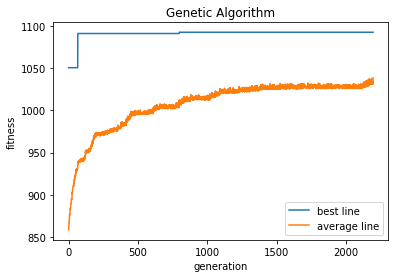

In [9]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(30,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
    totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
    return 0.5*totalProtein + 0.5*totalCalories
#     return 0.5*totalProtein 
    
def breeding(data, chromosome, badChromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        while cms.chromosome in badChromosome:
            cms.chromosome = mutate(cms.chromosome)
            print('detect bad chr!')
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            if cms.chromosome not in badChromosome:
                badChromosome.append(cms.chromosome) 
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('bad chromosome: ' + str(len(badChromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
        if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
            if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False
    
    
# def findBestAndAve(chromosome):
#     for i in chromosome:
#         chromosome[i] = fitnessFn(chromosome[i])
#     chromosome.sort(reverse = True)
#     for j in chromosome:
#         crossover(chromosome[j],chromosome[j+1])

# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = 0
    for i in range(0, len(chromosome)):
        temp = int(chromosome[i])*(2**(len(chromosome)-i-1))
        menuNumber += temp
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    return {"sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}

chromosome = []
badChromosome = []
bestLn = []
avgLn = []
genNumber = list(range(1))
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in genNumber:
    breeding(article_read, chromosome, badChromosome, bestLn, avgLn)
    gen = gen + 1
    if 0.05 * bestLn[-1] < abs(bestLn[-1] - avgLn[-1]):
        genNumber.append(i+1)
        print(genNumber[-1])
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 









In [35]:
if 'a' not in ['b','c']:
    print('a')

a
